In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from keras.datasets import cifar10

In [43]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [44]:
# dim of data
print("traing :",x_train.shape,y_train.shape,sep="\n")

traing :
(50000, 32, 32, 3)
(50000, 1)


In [45]:
print("Testing :",x_test.shape,y_test.shape,sep="\n")

Testing :
(10000, 32, 32, 3)
(10000, 1)


In [46]:
y_label = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

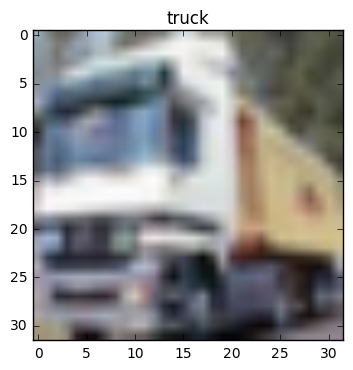

In [47]:
plt.imshow(x_train[1])
plt.title(y_label[int(y_train[1])])

In [48]:
# reshape data training
x_train_reshape = x_train.reshape(-1,3,32,32).astype("float32")
x_test_reshape = x_test.reshape(-1,3,32,32).astype("float32")

In [49]:
from keras.utils import to_categorical

In [50]:
y_train_label = to_categorical(y_train)

In [51]:
#build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu",input_shape=(3,32,32)))

In [54]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

In [55]:
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

In [56]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

In [57]:
model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

In [58]:
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding="same"))

In [59]:
model.add(Flatten())

In [60]:
model.add(Dense(1024,activation="relu"))

In [61]:
model.add(Dense(10,activation="softmax"))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 32, 32)         25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 16, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 16, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [63]:
model.compile(optimizer="Adam",loss ="categorical_crossentropy",metrics=["accuracy"])

In [64]:
model.fit(x_train_reshape,y_train_label,batch_size=100,epochs=30,validation_split=0.2,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 52s - loss: 14.5187 - acc: 0.0992 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 2/30
40000/40000 [==============================] - 50s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 3/30
40000/40000 [==============================] - 50s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 4/30
40000/40000 [==============================] - 51s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 5/30
40000/40000 [==============================] - 52s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 6/30
40000/40000 [==============================] - 51s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 7/30
40000/40000 [==============================] - 51s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 8/30
40000/40000 [================